In [30]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [31]:
data = pd.read_csv('data.csv')
data.head(20)

,F1,F2,Y
0,3.8915,4.2105,0
1,3.6898,6.6051,0
2,2.7763,7.5057,0
3,3.1137,5.7724,0
4,2.9251,5.4315,0
5,3.6699,6.4406,0
6,2.8404,3.8136,0
7,3.7729,5.2398,0
8,2.6465,3.4946,0
9,4.0902,5.9298,0


In [32]:
X = data[['F1', 'F2']]
y = data['Y']

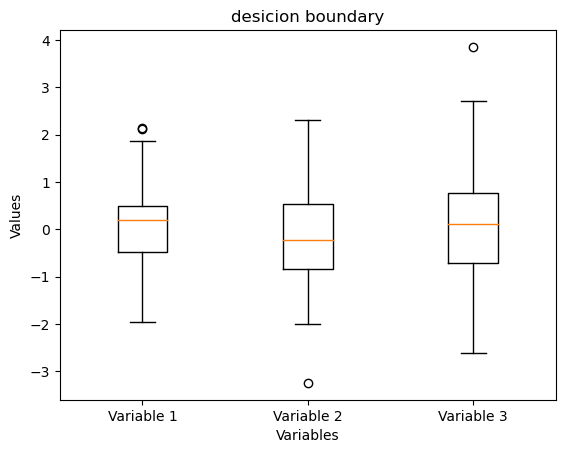

In [33]:



import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataset 'data' with multiple columns
# Each column represents a variable you want to visualize

# Generate some example data
np.random.seed(42)
data = np.random.randn(100, 3)

# Create a box plot
plt.boxplot(data, labels=['Variable 1', 'Variable 2', 'Variable 3'])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('desicion boundary')
plt.show()


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term to features
X_train_scaled_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled].astype(np.float32)

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

In [35]:
class LogisticRegressionModel(tf.Module):
    def __init__(self, num_features):
        self.W = tf.Variable(tf.zeros((num_features, 2), dtype=tf.float32), name='weights')

    def __call__(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W))

In [36]:
def cross_entropy(y_true, y_pred):
    return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-10), axis=1))


In [37]:
def train_logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape

    model = LogisticRegressionModel(num_features)

    optimizer = tf.optimizers.SGD(learning_rate)

    costs = []

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred = model(X)
            current_cost = cross_entropy(y, y_pred)

        gradients = tape.gradient(current_cost, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        costs.append(current_cost.numpy())

        print(f'Epoch {epoch + 1}/{num_epochs}, Cost: {current_cost.numpy()}')

    return model, costs

# Train the logistic regression model
learning_rate = 0.1
num_epochs = 1000

model, costs = train_logistic_regression(X_train_scaled_with_bias, y_train_one_hot, learning_rate, num_epochs)



Epoch 1/1000, Cost: 0.6931471824645996
Epoch 2/1000, Cost: 0.6496809720993042
Epoch 3/1000, Cost: 0.6123498678207397
Epoch 4/1000, Cost: 0.5802021026611328
Epoch 5/1000, Cost: 0.5524017214775085
Epoch 6/1000, Cost: 0.528236985206604
Epoch 7/1000, Cost: 0.5071133375167847
Epoch 8/1000, Cost: 0.48854026198387146
Epoch 9/1000, Cost: 0.4721147418022156
Epoch 10/1000, Cost: 0.4575067162513733
Epoch 11/1000, Cost: 0.4444451332092285
Epoch 12/1000, Cost: 0.4327070116996765
Epoch 13/1000, Cost: 0.422107994556427
Epoch 14/1000, Cost: 0.41249507665634155
Epoch 15/1000, Cost: 0.4037403166294098
Epoch 16/1000, Cost: 0.39573636651039124
Epoch 17/1000, Cost: 0.3883925974369049
Epoch 18/1000, Cost: 0.3816320598125458
Epoch 19/1000, Cost: 0.37538906931877136
Epoch 20/1000, Cost: 0.3696073889732361
Epoch 21/1000, Cost: 0.36423835158348083
Epoch 22/1000, Cost: 0.35923999547958374
Epoch 23/1000, Cost: 0.3545757234096527
Epoch 24/1000, Cost: 0.35021352767944336
Epoch 25/1000, Cost: 0.34612542390823364
Epo

Epoch 207/1000, Cost: 0.24370071291923523
Epoch 208/1000, Cost: 0.24363866448402405
Epoch 209/1000, Cost: 0.24357733130455017
Epoch 210/1000, Cost: 0.2435167282819748
Epoch 211/1000, Cost: 0.24345684051513672
Epoch 212/1000, Cost: 0.24339766800403595
Epoch 213/1000, Cost: 0.2433391511440277
Epoch 214/1000, Cost: 0.2432813197374344
Epoch 215/1000, Cost: 0.24322418868541718
Epoch 216/1000, Cost: 0.2431676834821701
Epoch 217/1000, Cost: 0.24311187863349915
Epoch 218/1000, Cost: 0.24305668473243713
Epoch 219/1000, Cost: 0.24300210177898407
Epoch 220/1000, Cost: 0.24294817447662354
Epoch 221/1000, Cost: 0.24289485812187195
Epoch 222/1000, Cost: 0.2428421527147293
Epoch 223/1000, Cost: 0.24279001355171204
Epoch 224/1000, Cost: 0.2427384853363037
Epoch 225/1000, Cost: 0.24268750846385956
Epoch 226/1000, Cost: 0.24263712763786316
Epoch 227/1000, Cost: 0.24258732795715332
Epoch 228/1000, Cost: 0.24253806471824646
Epoch 229/1000, Cost: 0.24248936772346497
Epoch 230/1000, Cost: 0.2424411773681640

Epoch 416/1000, Cost: 0.23836863040924072
Epoch 417/1000, Cost: 0.23836000263690948
Epoch 418/1000, Cost: 0.23835143446922302
Epoch 419/1000, Cost: 0.23834291100502014
Epoch 420/1000, Cost: 0.23833449184894562
Epoch 421/1000, Cost: 0.23832611739635468
Epoch 422/1000, Cost: 0.2383178472518921
Epoch 423/1000, Cost: 0.2383095920085907
Epoch 424/1000, Cost: 0.23830144107341766
Epoch 425/1000, Cost: 0.2382933348417282
Epoch 426/1000, Cost: 0.23828527331352234
Epoch 427/1000, Cost: 0.23827728629112244
Epoch 428/1000, Cost: 0.2382693737745285
Epoch 429/1000, Cost: 0.23826155066490173
Epoch 430/1000, Cost: 0.23825374245643616
Epoch 431/1000, Cost: 0.23824600875377655
Epoch 432/1000, Cost: 0.2382383644580841
Epoch 433/1000, Cost: 0.23823074996471405
Epoch 434/1000, Cost: 0.23822316527366638
Epoch 435/1000, Cost: 0.23821568489074707
Epoch 436/1000, Cost: 0.23820824921131134
Epoch 437/1000, Cost: 0.2382008582353592
Epoch 438/1000, Cost: 0.2381935566663742
Epoch 439/1000, Cost: 0.2381862848997116


Epoch 636/1000, Cost: 0.23743310570716858
Epoch 637/1000, Cost: 0.2374313324689865
Epoch 638/1000, Cost: 0.23742957413196564
Epoch 639/1000, Cost: 0.23742780089378357
Epoch 640/1000, Cost: 0.23742608726024628
Epoch 641/1000, Cost: 0.23742437362670898
Epoch 642/1000, Cost: 0.2374226599931717
Epoch 643/1000, Cost: 0.2374209612607956
Epoch 644/1000, Cost: 0.2374192774295807
Epoch 645/1000, Cost: 0.2374175786972046
Epoch 646/1000, Cost: 0.23741593956947327
Epoch 647/1000, Cost: 0.23741428554058075
Epoch 648/1000, Cost: 0.23741264641284943
Epoch 649/1000, Cost: 0.23741097748279572
Epoch 650/1000, Cost: 0.23740939795970917
Epoch 651/1000, Cost: 0.23740777373313904
Epoch 652/1000, Cost: 0.2374061644077301
Epoch 653/1000, Cost: 0.23740455508232117
Epoch 654/1000, Cost: 0.2374029904603958
Epoch 655/1000, Cost: 0.23740144073963165
Epoch 656/1000, Cost: 0.2373998612165451
Epoch 657/1000, Cost: 0.23739831149578094
Epoch 658/1000, Cost: 0.23739679157733917
Epoch 659/1000, Cost: 0.237395241856575
Ep

Epoch 840/1000, Cost: 0.23723289370536804
Epoch 841/1000, Cost: 0.23723241686820984
Epoch 842/1000, Cost: 0.23723196983337402
Epoch 843/1000, Cost: 0.23723146319389343
Epoch 844/1000, Cost: 0.23723101615905762
Epoch 845/1000, Cost: 0.23723053932189941
Epoch 846/1000, Cost: 0.2372300624847412
Epoch 847/1000, Cost: 0.237229585647583
Epoch 848/1000, Cost: 0.2372291535139084
Epoch 849/1000, Cost: 0.23722867667675018
Epoch 850/1000, Cost: 0.23722824454307556
Epoch 851/1000, Cost: 0.23722779750823975
Epoch 852/1000, Cost: 0.23722735047340393
Epoch 853/1000, Cost: 0.23722688853740692
Epoch 854/1000, Cost: 0.2372264862060547
Epoch 855/1000, Cost: 0.23722600936889648
Epoch 856/1000, Cost: 0.23722557723522186
Epoch 857/1000, Cost: 0.23722514510154724
Epoch 858/1000, Cost: 0.2372247278690338
Epoch 859/1000, Cost: 0.2372242957353592
Epoch 860/1000, Cost: 0.23722390830516815
Epoch 861/1000, Cost: 0.23722343146800995
Epoch 862/1000, Cost: 0.2372230589389801
Epoch 863/1000, Cost: 0.23722262680530548


In [38]:
def train_logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape

    model = LogisticRegressionModel(num_features)

    optimizer = tf.optimizers.SGD(learning_rate)

    costs = []

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred = model(X)
            current_cost = cross_entropy(y, y_pred)

        gradients = tape.gradient(current_cost, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        costs.append(current_cost.numpy())

        print(f'Epoch {epoch + 1}/{num_epochs}, Cost: {current_cost.numpy()}')

    return model, costs

# Train the logistic regression model
learning_rate = 5
num_epochs = 100

model, costs = train_logistic_regression(X_train_scaled_with_bias, y_train_one_hot, learning_rate, num_epochs)



Epoch 1/100, Cost: 0.6931471824645996
Epoch 2/100, Cost: 0.2578355669975281
Epoch 3/100, Cost: 0.24415946006774902
Epoch 4/100, Cost: 0.24100670218467712
Epoch 5/100, Cost: 0.24001844227313995
Epoch 6/100, Cost: 0.23941972851753235
Epoch 7/100, Cost: 0.2389531135559082
Epoch 8/100, Cost: 0.2385757863521576
Epoch 9/100, Cost: 0.2382708489894867
Epoch 10/100, Cost: 0.23802590370178223
Epoch 11/100, Cost: 0.23783059418201447
Epoch 12/100, Cost: 0.23767609894275665
Epoch 13/100, Cost: 0.23755469918251038
Epoch 14/100, Cost: 0.23745998740196228
Epoch 15/100, Cost: 0.23738661408424377
Epoch 16/100, Cost: 0.23733007907867432
Epoch 17/100, Cost: 0.23728680610656738
Epoch 18/100, Cost: 0.23725378513336182
Epoch 19/100, Cost: 0.23722875118255615
Epoch 20/100, Cost: 0.23720984160900116
Epoch 21/100, Cost: 0.23719558119773865
Epoch 22/100, Cost: 0.23718488216400146
Epoch 23/100, Cost: 0.23717689514160156
Epoch 24/100, Cost: 0.23717093467712402
Epoch 25/100, Cost: 0.23716644942760468
Epoch 26/100, 

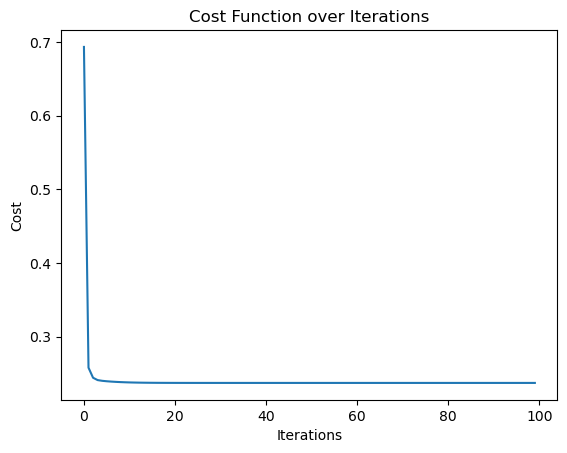

In [39]:
# Plot the cost function over epochs
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

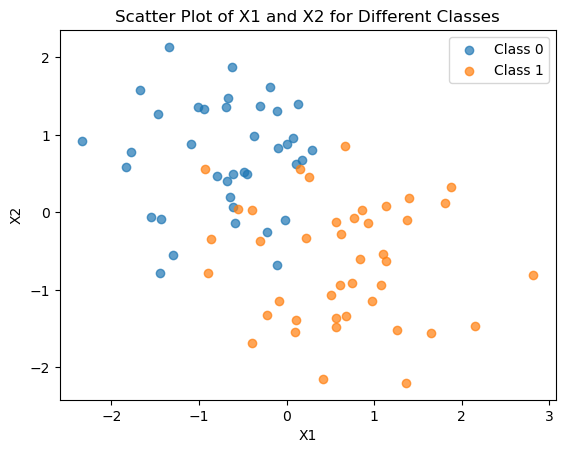

In [40]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = np.unique(y_train)

for class_label in class_labels:
    class_data = X_train_scaled[y_train == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', alpha=0.7)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 and X2 for Different Classes')
plt.legend()
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Predict labels on training data
y_train_pred = np.argmax(model(X_train_scaled_with_bias).numpy(), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')

# Display metrics


Confusion Matrix:
[[35  3]
 [ 5 37]]
